# Exercise 2-2: Write your own code for the Mortality Notebook

In [1]:
import pandas as pd

## Get the long and wide DataFrames

In [2]:
mortality_data = pd.read_pickle('mortality_data.pkl')
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [3]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714


## Work With the long DataFrame

In [4]:
mortality_data.head(5)

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [5]:
mortality_data.rename(columns={"Death Rate":"Deaths/100k","Age Group":"AgeGroup"}, inplace=True)
# mortality_data['Death Rate'] = mortality_data[['Deaths/100k']] - not work
# mortality_data.columns = mortality_data.columns.str.replace('DeathRate','Deaths/100K') - textbook
mortality_data

,Year,AgeGroup,Deaths/100k
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [7]:
mortality_data.query('Year >=1915 and Year <= 1920').tail(6)

,Year,AgeGroup,Deaths/100k,MeanCentered
372,1915,15-19 Years,330.9,137.97584
373,1916,15-19 Years,355.8,162.87584
374,1917,15-19 Years,380.3,187.37584
375,1918,15-19 Years,777.4,584.47584
376,1919,15-19 Years,438.5,245.57584
377,1920,15-19 Years,402.9,209.97584


In [8]:
mortality_data.query('AgeGroup == "1-4 Years"')[['Year','Deaths/100k']]

,Year,Deaths/100k
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5
...,...,...
114,2014,24.0
115,2015,24.9
116,2016,25.3
117,2017,24.3


In [19]:
with pd.option_context(
    'display.max_rows', 6,
    'display.max_columns', None):
    display(mortality_data.sort_values('Deaths/100k', ascending=False))

,Year,AgeGroup,Deaths/100k,MeanCentered
0,1900,1-4 Years,1983.8,1790.87584
1,1901,1-4 Years,1695.0,1502.07584
2,1902,1-4 Years,1655.7,1462.77584
...,...,...,...,...
233,2014,5-9 Years,11.5,-181.42416
229,2010,5-9 Years,11.5,-181.42416
231,2012,5-9 Years,11.4,-181.52416


In [26]:
mortality_data[["Deaths/100k"]].median()

Deaths/100k    89.5
dtype: float64

In [30]:
mortality_data.groupby('Year')[['Deaths/100k']].sum()

,Deaths/100k
Year,
1900,3233.0
1901,2850.6
1902,2733.0
1903,2659.1
1904,2793.1
...,...
2014,95.0
2015,99.5
2016,103.3


## Work with the wide DataFrame

In [32]:
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714


In [33]:
mortality_wide.index

RangeIndex(start=0, stop=119, step=1)

In [36]:
mortality_wide.describe()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
count,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1959.000000,0.003832,0.001173,0.000938,0.001774
std,34.496377,0.005005,0.001275,0.000884,0.001384
min,1900.000000,0.000240,0.000114,0.000139,0.000448
25%,1929.500000,0.000507,0.000240,0.000272,0.000855
50%,1959.000000,0.001091,0.000484,0.000446,0.001069
75%,1988.500000,0.005773,0.001989,0.001589,0.002837
max,2018.000000,0.019838,0.004661,0.003751,0.007774


In [37]:
mortality_wide.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.000000,34.496377,1900.000000,1929.500000,1959.000000,1988.500000,2018.000000
01-04 Years,119.0,0.003832,0.005005,0.000240,0.000507,0.001091,0.005773,0.019838
05-09 Years,119.0,0.001173,0.001275,0.000114,0.000240,0.000484,0.001989,0.004661
10-14 Years,119.0,0.000938,0.000884,0.000139,0.000272,0.000446,0.001589,0.003751
15-19 Years,119.0,0.001774,0.001384,0.000448,0.000855,0.001069,0.002837,0.007774


In [43]:
mortality_wide[['Year', '01-04 Years']]

,Year,01-04 Years
0,1900,0.019838
1,1901,0.016950
2,1902,0.016557
3,1903,0.015421
4,1904,0.015915
...,...,...
114,2014,0.000240
115,2015,0.000249
116,2016,0.000253
117,2017,0.000243


In [44]:
mortality_wide.query('Year >= 1915 and Year <= 1920')

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
15,1915,0.009242,0.002606,0.001967,0.003309
16,1916,0.011115,0.002824,0.002051,0.003558
17,1917,0.010660,0.002907,0.002189,0.003803
18,1918,0.015735,0.004479,0.003751,0.007774
19,1919,0.009280,0.003000,0.002364,0.004385
20,1920,0.009872,0.002952,0.002299,0.004029


In [45]:
mortality_wide.query('Year >= 1915 and Year <= 1920')[['Year','01-04 Years']]

,Year,01-04 Years
15,1915,0.009242
16,1916,0.011115
17,1917,0.010660
18,1918,0.015735
19,1919,0.009280
20,1920,0.009872


In [47]:
mortality_wide.groupby('Year').agg(['mean','median','sum'])

01-04 Years                     05-09 Years                      \
            mean    median       sum        mean    median       sum   
Year                                                                   
1900    0.019838  0.019838  0.019838    0.004661  0.004661  0.004661   
1901    0.016950  0.016950  0.016950    0.004276  0.004276  0.004276   
1902    0.016557  0.016557  0.016557    0.004033  0.004033  0.004033   
1903    0.015421  0.015421  0.015421    0.004147  0.004147  0.004147   
1904    0.015915  0.015915  0.015915    0.004250  0.004250  0.004250   
...          ...       ...       ...         ...       ...       ...   
2014    0.000240  0.000240  0.000240    0.000115  0.000115  0.000115   
2015    0.000249  0.000249  0.000249    0.000117  0.000117  0.000117   
2016    0.000253  0.000253  0.000253    0.000122  0.000122  0.000122   
2017    0.000243  0.000243  0.000243    0.000116  0.000116  0.000116   
2018    0.000240  0.000240  0.000240    0.000115  0.000115  0.000115   

     10-14 Years                     15-19 Years                      
            mean    median       sum        mean    median       sum  
Year                                                                  
1900    0.002983  0.002983  0.002983    0.004848  0.004848  0.004848  
1901    0.002736  0.002736  0.002736    0.004544  0.004544  0.004544  
1902    0.002525  0.002525  0.002525    0.004215  0.004215  0.004215  
1903    0.002682  0.002682  0.002682    0.004341  0.004341  0.004341  
1904    0.003052  0.003052  0.003052    0.004714  0.004714  0.004714  
...          ...       ...       ...         ...       ...       ...  
2014    0.000140  0.000140  0.000140    0.000455  0.000455  0.000455  
2015    0.000146  0.000146  0.000146    0.000483  0.000483  0.000483  
2016    0.000146  0.000146  0.000146    0.000512  0.000512  0.000512  
2017    0.000155  0.000155  0.000155    0.000515  0.000515  0.000515  
2018    0.000149  0.000149  0.000149    0.000492  0.000492  0.000492  

[119 rows x 12 columns]

In [50]:
mortality_wide['TotalDeathRates'] = mortality_wide['01-04 Years'] + mortality_wide['05-09 Years'] 
+ mortality_wide['10-14 Years'] + mortality_wide['15-19 Years']
mortality_wide

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years,TotalDeaths,TotalDeathRates
0,1900,0.019838,0.004661,0.002983,0.004848,0.024499,0.024499
1,1901,0.016950,0.004276,0.002736,0.004544,0.021226,0.021226
2,1902,0.016557,0.004033,0.002525,0.004215,0.020590,0.020590
3,1903,0.015421,0.004147,0.002682,0.004341,0.019568,0.019568
4,1904,0.015915,0.004250,0.003052,0.004714,0.020165,0.020165
...,...,...,...,...,...,...,...
114,2014,0.000240,0.000115,0.000140,0.000455,0.000355,0.000355
115,2015,0.000249,0.000117,0.000146,0.000483,0.000366,0.000366
116,2016,0.000253,0.000122,0.000146,0.000512,0.000375,0.000375
117,2017,0.000243,0.000116,0.000155,0.000515,0.000359,0.000359


<AxesSubplot:xlabel='Year'>

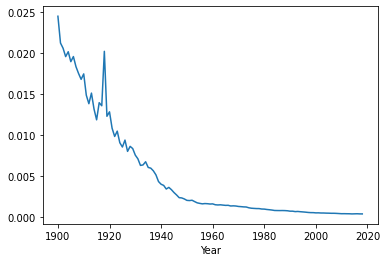

In [56]:
mortality_wide.groupby('Year').TotalDeathRates.sum().plot()